### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the likelihood of pet adoption. You have been provided with a dataset named **`"pet_adoption.csv"`**, which includes various parameters that affect the likelihood of pet adoption. The dataset comprises the following columns:

- `pet_id:` Unique identifier for each pet.
- `pet_type:` Type of pet (e.g., Dog, Cat, Bird, Rabbit).
- `breed:` Specific breed of the pet.
- `age_months:` Age of the pet in months.
- `color:` Color of the pet.
- `size:` Size category of the pet (Small, Medium, Large).
- `weight_kg:` Weight of the pet in kilograms.
- `vaccinated:` Vaccination status of the pet (0 - Not vaccinated, 1 - Vaccinated).
- `health_condition:` Health condition of the pet (0 - Healthy, 1 - Medical condition).
- `timein_shelter_days:` Duration the pet has been in the shelter (days).
- `adoption_fee:` Adoption fee charged for the pet (in dollars).
- `previous_owner:` Whether the pet had a previous owner (0 - No, 1 - Yes).
- `adoption_likelihood:` Likelihood of the pet being adopted (0 - Unlikely, 1 - Likely).

Your task is to use this dataset to build and evaluate machine learning models to predict the likelihood of pet adoption based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using a Decision Tree algorithm.

**Dataset credits:** Rabie El Kharoua (https://www.kaggle.com/datasets/rabieelkharoua/predict-pet-adoption-status-dataset)

**Import Necessary Libraries**

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sn
from    matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Task 1: Data Preparation and Exploration

1. Import the data from the `"pet_adoption_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Drop the columns that do not add much value to the analysis `('pet_id')`.
5. Visualize the distribution of the target variable 'adoption_likelihood' using a bar chart.
6. Visualize the distribution of 'age_months' and 'adoption_fee' using histograms.

In [3]:
# Step 1: Import the data from the "pet_adoption.csv" file
df= pd.read_csv('pet_adoption_data.csv')

# Step 2: Display the number of rows and columns in the dataset
df.head()

# Step 3: Display the first few rows of the dataset to get an overview
df.shape

(2007, 13)

In [6]:
# Step 4: Drop the columns that do not add much value to the analysis
df.drop(['pet_id'],inplace=True, axis=1)
df.head()


,pet_type,breed,age_months,color,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood
0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


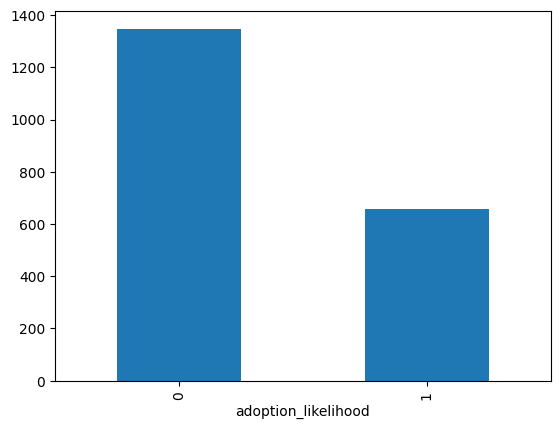

In [9]:
# Step 5: Visualize the distribution of the target variable 'adoption_likelihood' using a bar chart
df['adoption_likelihood'].value_counts().plot(kind='bar')
plt.show()

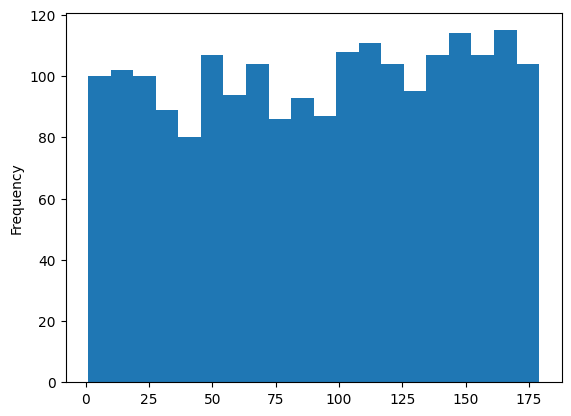

In [11]:
# Step 6: Visualize the distribution of 'age_months' using a histogram
df['age_months'].plot(kind='hist', bins=20)
plt.show()

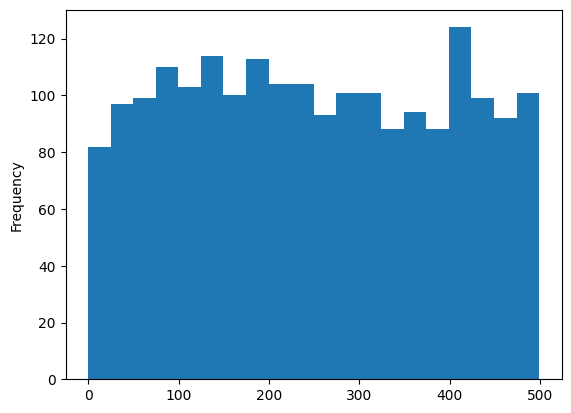

In [12]:

# Step 7: Visualize the distribution of 'adoption_fee' using a histogram
df['adoption_fee'].plot(kind='hist', bins=20)
plt.show()

### Task 2: Data Encoding and Scaling

1. Encode the categorical variables:
    - `'size'`: Encode by mapping it to numbers (e.g., Small=1, Medium=2, Large=3).
    - `'color'`, `'pet_type'`, `'breed'`: Apply one-hot encoding.
<br></br>
3. Scale the numerical features:
    - `'weight_kg'`: MinMax scaling.
    - `'adoption_fee'`: Standard scaling.
<br></br>
4. Display the first few rows of the updated dataset.

In [ ]:
# Step 1: Encode the categorical variables

# Encode 'size' by mapping it to numbers (e.g., Small=1, Medium=2, Large=3).
df['size_map']=df['size'].map({'Small':1, 'Medium':2, 'Large':3})
df.drop(['size'], inplace=True, axis=1)
df.head()

,pet_type,breed,age_months,color,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood,size_map
0,Bird,Parakeet,131,Orange,5.039768,1,0,27,140,0,0,3
1,Rabbit,Rabbit,73,White,16.086727,0,0,8,235,0,0,3
2,Dog,Golden Retriever,136,Orange,2.076286,0,0,85,385,0,0,2
3,Bird,Parakeet,97,White,3.339423,0,0,61,217,1,0,1
4,Rabbit,Rabbit,123,Gray,20.498100,0,0,28,14,1,0,3


In [15]:
# Encode 'color', 'pet_type' and 'breed' using one-hot encoding
df = pd.get_dummies(df, columns=['color', 'pet_type', 'breed'], drop_first=True)
df.head()

,age_months,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood,size_map,color_Brown,color_Gray,color_Orange,color_White,pet_type_Cat,pet_type_Dog,pet_type_Rabbit,breed_Labrador,breed_Parakeet,breed_Persian,breed_Poodle,breed_Rabbit,breed_Siamese
0,131,5.039768,1,0,27,140,0,0,3,False,False,True,False,False,False,False,False,True,False,False,False,False
1,73,16.086727,0,0,8,235,0,0,3,False,False,False,True,False,False,True,False,False,False,False,True,False
2,136,2.076286,0,0,85,385,0,0,2,False,False,True,False,False,True,False,False,False,False,False,False,False
3,97,3.339423,0,0,61,217,1,0,1,False,False,False,True,False,False,False,False,True,False,False,False,False
4,123,20.498100,0,0,28,14,1,0,3,False,True,False,False,False,False,True,False,False,False,False,True,False


In [16]:
# Step 2: Scale the numerical features

# Scale 'weight_kg' using MinMaxScaler
scaler1=MinMaxScaler()
df['weight_kg']=scaler1.fit_transform(df[['weight_kg']])
df.head()



,age_months,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood,size_map,color_Brown,color_Gray,color_Orange,color_White,pet_type_Cat,pet_type_Dog,pet_type_Rabbit,breed_Labrador,breed_Parakeet,breed_Persian,breed_Poodle,breed_Rabbit,breed_Siamese
0,131,0.138783,1,0,27,140,0,0,3,False,False,True,False,False,False,False,False,True,False,False,False,False
1,73,0.520009,0,0,8,235,0,0,3,False,False,False,True,False,False,True,False,False,False,False,True,False
2,136,0.036514,0,0,85,385,0,0,2,False,False,True,False,False,True,False,False,False,False,False,False,False
3,97,0.080105,0,0,61,217,1,0,1,False,False,False,True,False,False,False,False,True,False,False,False,False
4,123,0.672244,0,0,28,14,1,0,3,False,True,False,False,False,False,True,False,False,False,False,True,False


In [17]:
# Scale 'adoption_fee' using StandardScaler
scaler2=StandardScaler()
df['adoption_fee']=scaler2.fit_transform(df[['adoption_fee']])

In [18]:
df.head()

,age_months,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood,size_map,color_Brown,color_Gray,color_Orange,color_White,pet_type_Cat,pet_type_Dog,pet_type_Rabbit,breed_Labrador,breed_Parakeet,breed_Persian,breed_Poodle,breed_Rabbit,breed_Siamese
0,131,0.138783,1,0,27,-0.764025,0,0,3,False,False,True,False,False,False,False,False,True,False,False,False,False
1,73,0.520009,0,0,8,-0.098998,0,0,3,False,False,False,True,False,False,True,False,False,False,False,True,False
2,136,0.036514,0,0,85,0.951044,0,0,2,False,False,True,False,False,True,False,False,False,False,False,False,False
3,97,0.080105,0,0,61,-0.225003,1,0,1,False,False,False,True,False,False,False,False,True,False,False,False,False
4,123,0.672244,0,0,28,-1.646060,1,0,3,False,True,False,False,False,False,True,False,False,False,False,True,False


In [9]:
# step3: Display the first few rows of the updated dataset.



### Task 3: Model Training Using Decision Tree

1. Select the features and the target variable `('adoption_likelihood')` for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train a Decision Tree Classifier using the training data.
4. Print the model's accuracy score on the test data.
5. Make predictions on the test set.
6. Evaluate the model using a classification report and confusion matrix.
7. Visualize the confusion matrix.
8. Visualize the decision tree structure.

In [22]:
# Step 1: Select the features and the target variable for modeling
X=df.drop(['adoption_likelihood'],axis=1)
y=df['adoption_likelihood']


# Step 2: Split the data into training and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Step 3: Initialize and train a Decision Tree Classifier using the training data
model=DecisionTreeClassifier()
model.fit(X_train,y_train)


# Step 4: Print the model's accuracy score on the test data
model.score(X_test,y_test)


0.8739635157545605

In [25]:
# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model using a classification report and confusion matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       403
           1       0.77      0.88      0.82       200

    accuracy                           0.87       603
   macro avg       0.85      0.87      0.86       603
weighted avg       0.88      0.87      0.88       603



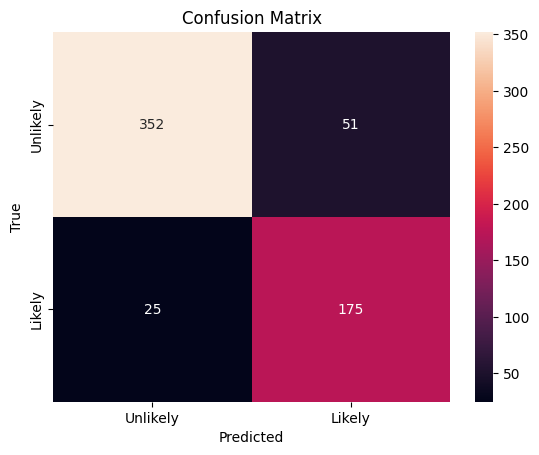

In [27]:
# Step 7: Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, fmt='d', xticklabels=['Unlikely', 'Likely'], yticklabels=['Unlikely', 'Likely'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Task 4: Experiment with Hyperparameters in Decision Tree

1. Train the Decision Tree model with the following parameters:
   - criterion='entropy'
   - max_depth=5
   - min_samples_split=10
   - min_samples_leaf=5

Learn about these parameters here: [DecisionTreeClassifier Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------


2. Print the model's accuracy score on the test data.
3. Evaluate the model using a classification report and confusion matrix.
4. Visualize the confusion matrix.
5. Visualize the decision tree structure.

In [14]:
# Step 1: Train the Decision Tree model with specified hyperparameters



# Step 2: Print the model's accuracy score on the test data


# Step 3: Make predictions on the test set


# Step 4: Evaluate the model using a classification report and confusion matrix



In [15]:
# Step 5: Visualize the confusion matrix


In [16]:
# Step 6: Visualize the decision tree
